# task - 1

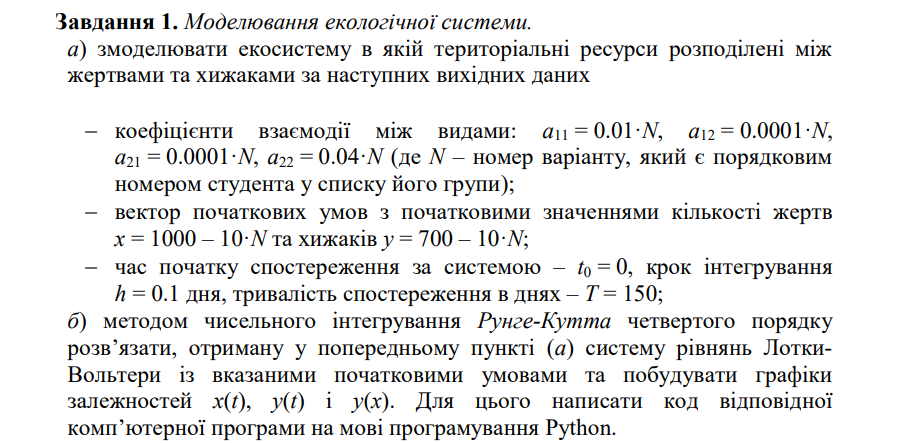

In [1]:
import numpy as np

In [2]:
# my group-list ID
n = 7

In [3]:
# коефіцієнти взаємодії між видами:
coeficients = lambda N: np.array([
  [0.01 * N, 0.0001 * N],
  [0.0001 * N, 0.04 * N],
])
A = coeficients(n)
A

array([[0.07  , 0.0007],
       [0.0007, 0.28  ]])

In [4]:
# вектор початкових умов
x, y = lambda N: 1000 - 10 * N, lambda N: 700 - 10 * N
x0, y0 = x(n), y(n)
x0, y0

(930, 630)

In [5]:
t0 = 0 # - час початку спостереження за системою
h = 0.1 # - крок інтегрування дня
T = 150 # - тривалість спостереження в днях

In [6]:
# The t variable is technically unused in the Lotka-Volterra function since 
# the system is autonomous (it doesn't explicitly depend on time). 
# However, it's still included for consistency with the Runge-Kutta solver, 
# which expects a function of the form f(t, state).
def lotka_volterra(t, state: tuple) -> np.array:
  x, y = state
  dxdt = A[0, 0] * x - A[0, 1] * x * y
  dydt = A[1, 0] * x * y - A[1, 1] * y
  return np.array([dxdt, dydt])

In [7]:
def runge_kutta4(func, t0, y0, h, T):
  steps = int(T / h) # num of steps
  t_values = np.linspace(t0, T, steps)
  y_values = np.zeros((steps, 2)) # Store [x, y] at each step
  y_values[0] = y0
  
  for i in range(1, steps):
    t = t_values[i - 1]
    y = y_values[i - 1]
    
    k1 = h * func(t, y)
    k2 = h * func(t + h / 2, y + k1 / 2)
    k3 = h * func(t + h / 2, y + k2 / 2)
    k4 = h * func(t + h, y + k3)
    
    y_values[i] = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
  return t_values, y_values

In [8]:
t_values, solution = runge_kutta4(
  func=lotka_volterra, 
  t0=t0, 
  y0=np.array([x0, y0]),
  h=h,
  T=T  
)

In [9]:
# Extract x and y values
x_vals, y_vals = solution[:, 0], solution[:, 1]
x_vals, y_vals

(array([930.        , 895.40362474, 860.72945219, ...,  54.70288323,
         53.96834232,  53.26981553]),
 array([630.        , 653.02138455, 675.24427585, ..., 296.68503524,
        289.5923853 , 282.65511992]))

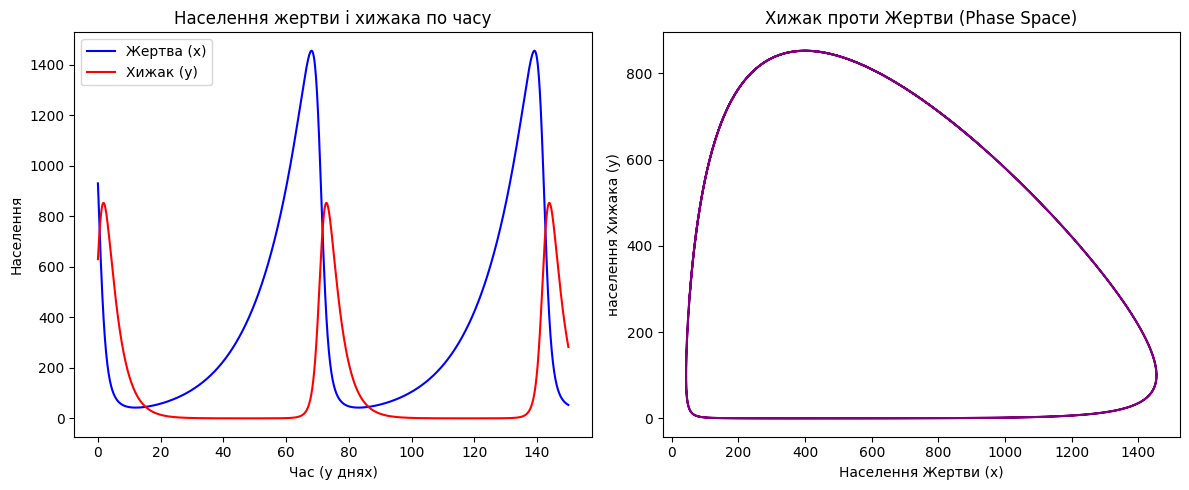

In [10]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(12, 5))

# Prey and Predator over time
plt.subplot(1, 2, 1)
plt.plot(t_values, x_vals, label="Жертва (x)", color='blue')
plt.plot(t_values, y_vals, label="Хижак (y)", color='red')
plt.xlabel("Час (у днях)")
plt.ylabel("Населення")
plt.legend()
plt.title("Населення жертви і хижака по часу")

# Phase space plot y(x)
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, color='purple')
plt.xlabel("Населення Жертви (x)")
plt.ylabel("населення Хижака (y)")
plt.title("Хижак проти Жертви (Phase Space)")

plt.tight_layout()
plt.show()